# Tes `SORA` dengan data SAO 184555

In [1]:
%config InlineBackend.figure_format = 'retina'

from sora import LightCurve, Body, Star, Observer, Occultation
import arviz as az
az.style.use('arviz-darkgrid')

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import os

from astropy.time import Time
import astropy.units as u

import numpy as np

from skyfield.api import load

# plt.rcParams['figure.figsize'] = (12,5)

pd.set_option('display.float_format',  '{:}'.format)

SORA version: 0.2.1


In [2]:
df = pd.read_csv('sao184555.csv', sep=',')
df.tail()

,FrameNum,timeInfo,signal-obj,appsum-obj,avgbkg-obj,stdbkg-obj,nmaskpx-obj,maxpx-obj,xcentroid-obj,ycentroid-obj
1695,4196.0,[14:31:54.7884274],-9983.0,1187648.0,32368.4,1524.1,-37,36992,361.0,400.0
1696,4197.0,[14:31:54.8085227],-3012.0,1195840.0,32401.4,1533.22,-37,37392,361.0,400.0
1697,4198.0,[14:31:54.8286181],3204.0,1201616.0,32389.51,1568.29,-37,37616,361.0,400.0
1698,4199.0,[14:31:54.8487134],13609.0,1211920.0,32386.8,1485.66,-37,36800,361.0,400.0
1699,4200.0,[14:31:54.8688087],1965.0,1203440.0,32472.29,1509.84,-37,37904,361.0,400.0


In [3]:
# hilangkan karakter [ dan ] dari data
df['timeInfo'] = df['timeInfo'].map((lambda x: x.lstrip('[').rstrip(']')))

# ubah ke format waktu dan ambil tanggal dan jamnya
df['timeInfo'] = pd.to_datetime(df['timeInfo'])

df.tail()

,FrameNum,timeInfo,signal-obj,appsum-obj,avgbkg-obj,stdbkg-obj,nmaskpx-obj,maxpx-obj,xcentroid-obj,ycentroid-obj
1695,4196.0,2022-08-09 14:31:54.788427,-9983.0,1187648.0,32368.4,1524.1,-37,36992,361.0,400.0
1696,4197.0,2022-08-09 14:31:54.808522,-3012.0,1195840.0,32401.4,1533.22,-37,37392,361.0,400.0
1697,4198.0,2022-08-09 14:31:54.828618,3204.0,1201616.0,32389.51,1568.29,-37,37616,361.0,400.0
1698,4199.0,2022-08-09 14:31:54.848713,13609.0,1211920.0,32386.8,1485.66,-37,36800,361.0,400.0
1699,4200.0,2022-08-09 14:31:54.868808,1965.0,1203440.0,32472.29,1509.84,-37,37904,361.0,400.0


In [4]:
data = df[['FrameNum','timeInfo','signal-obj']]
data.columns = ['Frame','Time', 'Value']
data.tail()

,Frame,Time,Value
1695,4196.0,2022-08-09 14:31:54.788427,-9983.0
1696,4197.0,2022-08-09 14:31:54.808522,-3012.0
1697,4198.0,2022-08-09 14:31:54.828618,3204.0
1698,4199.0,2022-08-09 14:31:54.848713,13609.0
1699,4200.0,2022-08-09 14:31:54.868808,1965.0


In [5]:
data_cp = data.copy()

data_cp['JD'] = Time(data_cp['Time']).jd

data_cp['frac_JD'] = data_cp['JD'] - np.floor(data_cp['JD']).astype(int)
data_cp

,Frame,Time,Value,JD,frac_JD
0,2501.0,2022-08-09 14:31:20.726998,59845.0,2459801.105101007,0.10510100703686476
1,2502.0,2022-08-09 14:31:20.747093,45838.0,2459801.1051012394,0.10510123940184712
2,2503.0,2022-08-09 14:31:20.767188,54117.0,2459801.105101472,0.10510147223249078
3,2504.0,2022-08-09 14:31:20.787284,74622.0,2459801.1051017046,0.10510170459747314
4,2505.0,2022-08-09 14:31:20.807379,49582.0,2459801.1051019374,0.1051019374281168
...,...,...,...,...,...
1695,4196.0,2022-08-09 14:31:54.788427,-9983.0,2459801.1054952363,0.10549523634836078
1696,4197.0,2022-08-09 14:31:54.808522,-3012.0,2459801.105495469,0.10549546917900443
1697,4198.0,2022-08-09 14:31:54.828618,3204.0,2459801.1054957015,0.1054957015439868
1698,4199.0,2022-08-09 14:31:54.848713,13609.0,2459801.1054959344,0.10549593437463045


Text(0.5, 0, 'Frames')

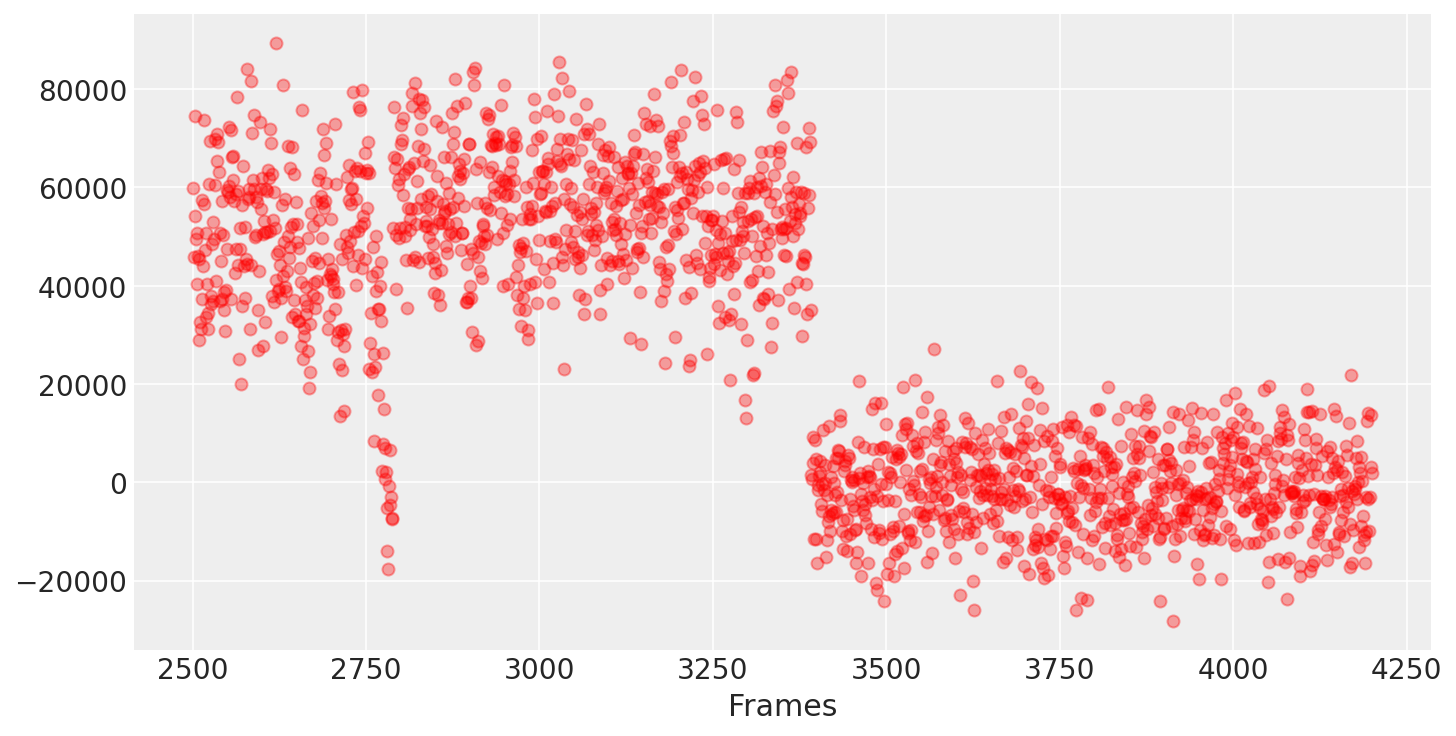

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_cp['Frame'], data_cp['Value'], 'ro', alpha=0.35)
# ax.set_xlim(3300, 3700)
ax.set_xlabel('Frames')

## *Data smoothing*

In [7]:
# from scipy.signal import savgol_filter

# x = data_cp['Frame']
# y = data_cp['Value']
# y_filtered = savgol_filter(y, 10, 3)

In [8]:
# plt.figure(figsize=(10,5))
# plt.scatter(x, y_filtered, c='r', marker='o', alpha=0.3)
# # plt.xlim(3300, 3700)

## Normalisasi

Text(0.5, 0, 'Frames')

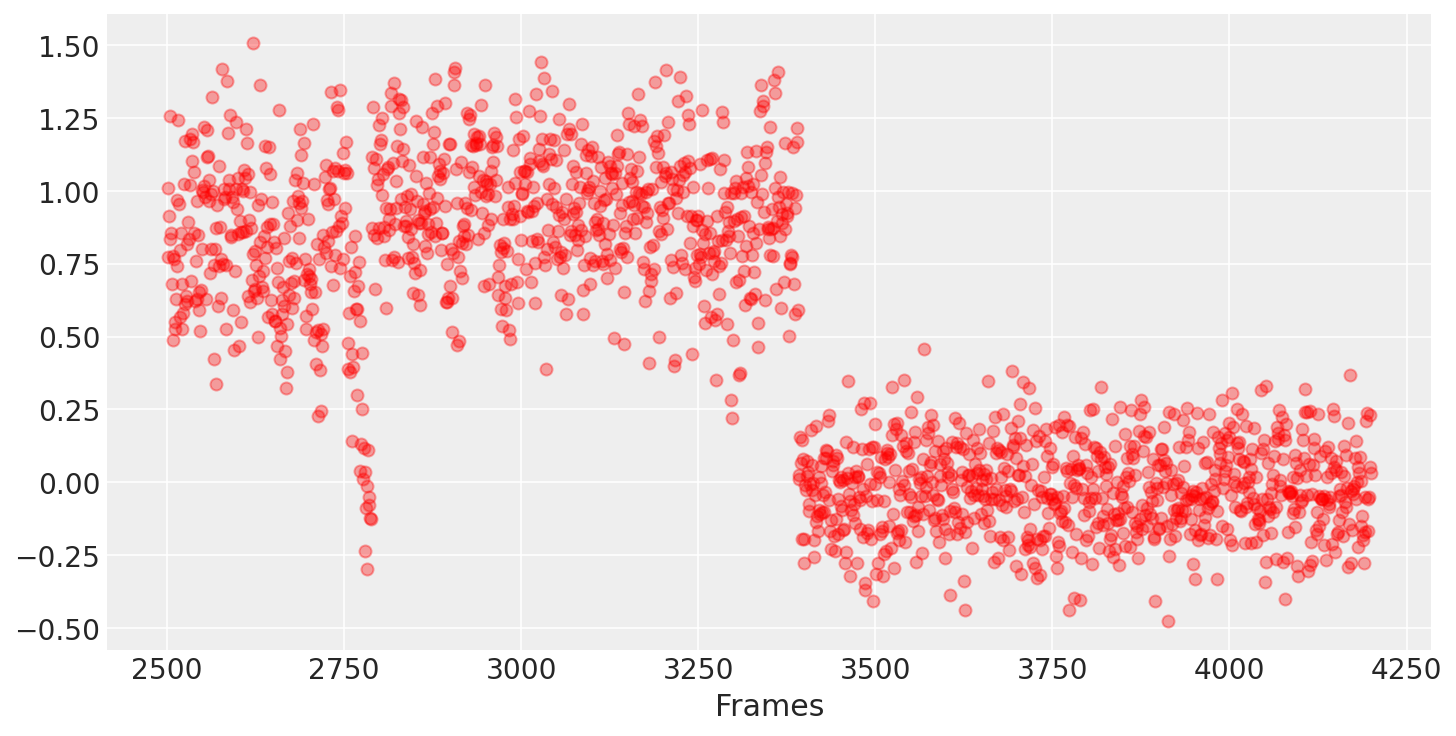

In [9]:
# data_cp['y_scaled'] = y_filtered/(y_filtered.std()*2)

data_cp['y_scaled'] = data_cp['Value']/(data_cp['Value'].std()*2)


fig, ax = plt.subplots(figsize=(10,5))

ax.plot(data_cp['Frame'], data_cp['y_scaled'], 'ro', alpha=0.35)
ax.set_xlabel('Frames')

In [10]:
# tulis ke dalam file csv yang baru
data_cp.to_csv('lc_sao184555.csv', header=False, columns=['JD', 'y_scaled'], index=False, sep='\t')

In [11]:
data_cp

,Frame,Time,Value,JD,frac_JD,y_scaled
0,2501.0,2022-08-09 14:31:20.726998,59845.0,2459801.105101007,0.10510100703686476,1.0086612508167185
1,2502.0,2022-08-09 14:31:20.747093,45838.0,2459801.1051012394,0.10510123940184712,0.7725794037085262
2,2503.0,2022-08-09 14:31:20.767188,54117.0,2459801.105101472,0.10510147223249078,0.9121183208362997
3,2504.0,2022-08-09 14:31:20.787284,74622.0,2459801.1051017046,0.10510170459747314,1.2577211105095694
4,2505.0,2022-08-09 14:31:20.807379,49582.0,2459801.1051019374,0.1051019374281168,0.8356828830812021
...,...,...,...,...,...,...
1695,4196.0,2022-08-09 14:31:54.788427,-9983.0,2459801.1054952363,0.10549523634836078,-0.16825909043200438
1696,4197.0,2022-08-09 14:31:54.808522,-3012.0,2459801.105495469,0.10549546917900443,-0.050765940136351516
1697,4198.0,2022-08-09 14:31:54.828618,3204.0,2459801.1054957015,0.1054957015439868,0.05400201600161695
1698,4199.0,2022-08-09 14:31:54.848713,13609.0,2459801.1054959344,0.10549593437463045,0.22937373151248597


## Kurva cahaya untuk `SORA`

In [12]:
lc = LightCurve(name='SAO 184555', file='lc_sao184555.csv', exptime=0.02)

print(lc)

Light curve name: SAO 184555
Initial time: 2022-08-09 14:31:20.727 UTC
End time:     2022-08-09 14:31:54.869 UTC
Duration:     0.569 minutes
Time offset:  0.000 seconds

Exposure time:    0.0200 seconds
Cycle time:       0.0201 seconds
Num. data points: 1700


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




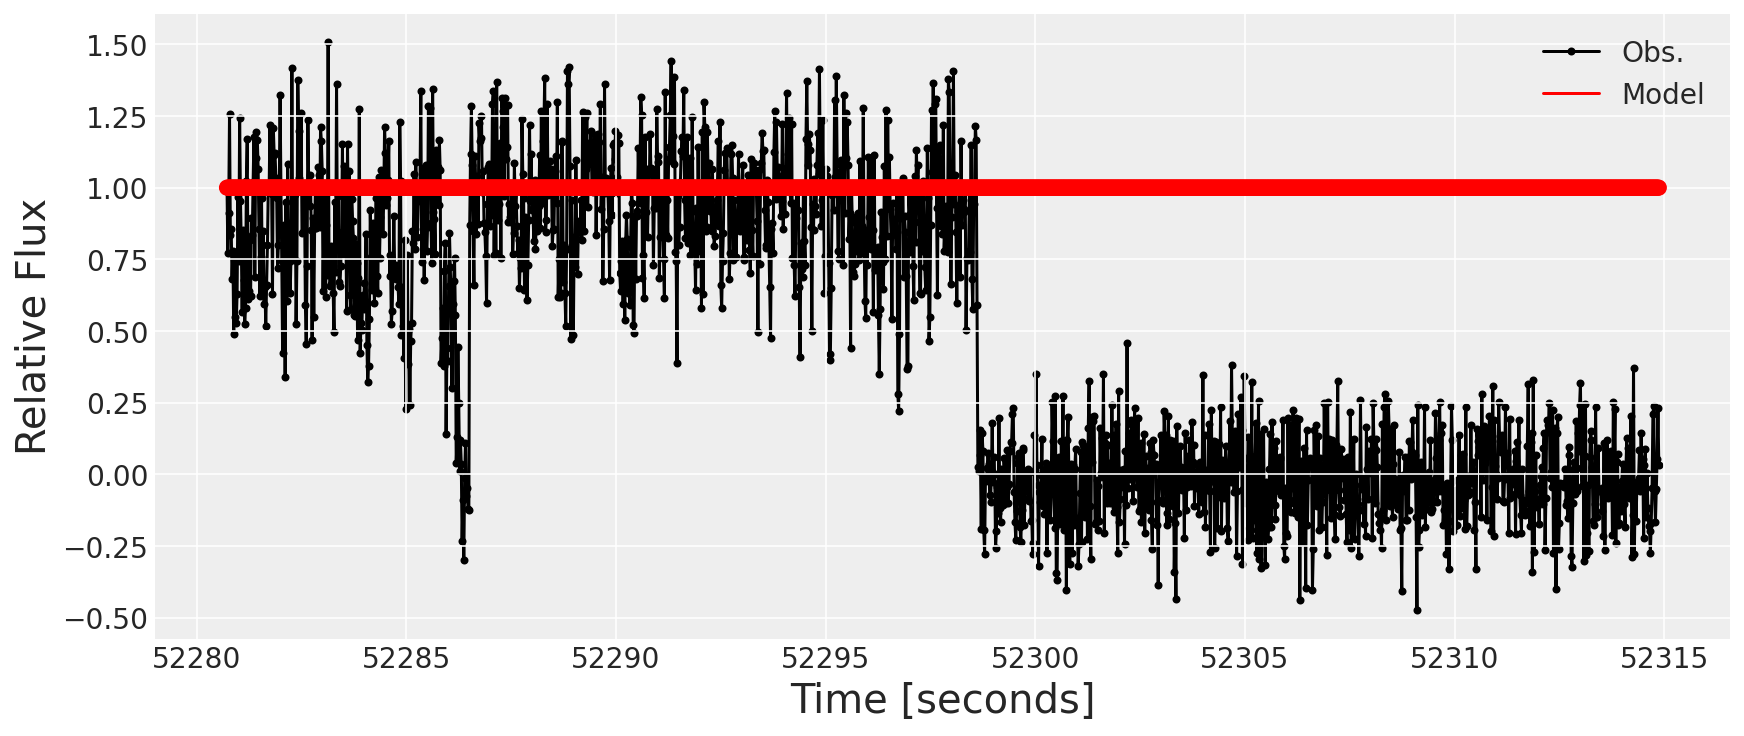

In [13]:
plt.figure(figsize=(12,5))
lc.plot_lc()
# plt.xlim(46628,46633)

{'rank': 1,
 'occultation_duration': 16.221678256988525,
 'central_time': 52306.73790693283,
 'immersion_time': 52298.62706780434,
 'emersion_time': 52314.848746061325,
 'time_err': 0.010038167238235474,
 'depth': 0.9033666543528124,
 'depth_err': 0.15254810367718694,
 'baseline': 0.8825564019950861,
 'baseline_err': 0.2594712111673959,
 'snr': 5.9218478144078555,
 'occ_mask': array([False, False, False, ...,  True,  True, False])}

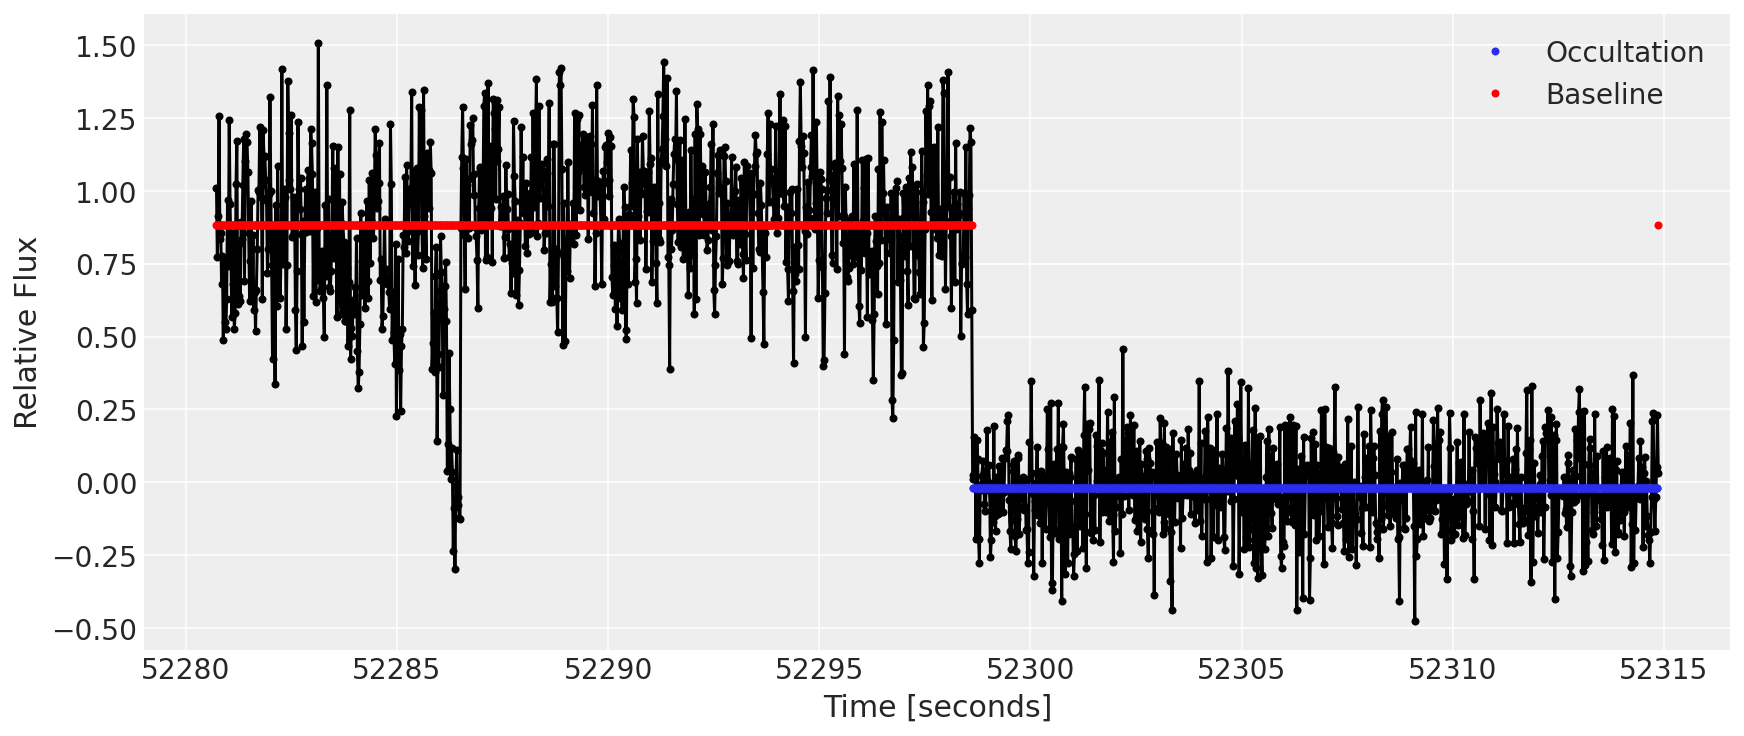

In [14]:
plt.figure(figsize=(12,5))
tes = lc.occ_detect(plot=True)
tes

## Pembuatan model

Model kurva cahaya okultasi oleh `SORA` memerlukan beberapa input:
 - Kecepatan bayangan saat *event*, dalam km/s
 - Jarak obyek, dalam AU
 - $\lambda$ pusat dan $\Delta \lambda$ (atau *bandwidth*), dalam mikron
 - Proyeksi diameter bintang pada jarak obyek, dalam km

### A. Jarak obyek penutup saat pengamatan

Untuk okultasi Bulan, obyek penutup adalah Bulan. Pengamatan dilakukan pada tanggal **7 Agustus 2022 pukul 14:31:38.6 UT**. Ephemeris diambil dari https://ssd.jpl.nasa.gov/ftp/eph/planets/ascii/.

In [15]:
# load timescale dan tampilkan waktu saat ini
ts = load.timescale()

# custom waktu untuk yyyy, mm, dd, hh, mm, ss
t = ts.utc(2022, 8, 7, 14, 31, 38.6)

In [16]:
# Load the JPL ephemeris DE430 (covers 1549-2650) dan cari jarak Bumi-Bulan
planets = load('de430.bsp')
earth, moon = planets['earth'], planets['moon']

In [17]:
# posisi Bulan dari Bumi
astrometric = earth.at(t).observe(moon)
ra, dec, distance = astrometric.radec()

In [18]:
# tampilkan koordinat Bulan dan jarak Bulan dalam AU
print(ra)
print(dec)
print(distance.au)

16h 43m 29.25s
-24deg 23' 14.2"
0.0024537221069353453


In [19]:
d_moon = distance.au
d_moon

0.0024537221069353453

In [20]:
lc.set_dist(dist=d_moon)

lc.dist

0.0024537221069353453

### B. Nilai $\lambda_0$ dan *bandwidth* $\Delta \lambda$

In [21]:
lc.set_filter(central_bandpass=0.55, delta_bandpass=0.2)

print('Observational wavelength centred at {:1.3f} with a bandwidth of {:1.3f} microns'
      .format(lc.central_bandpass,lc.delta_bandpass))

Observational wavelength centred at 0.550 with a bandwidth of 0.200 microns


### C. Proyeksi diameter bintang pada jarak obyek penutup

In [22]:
lc.fresnel_scale

0.010005169964172791

In [23]:
from sora import Star
from sora.star import kervella, van_belle

In [24]:
star = Star(coord='16 42  9.2 -24 49  9')

c:\Users\User\.conda\envs\work2\lib\site-packages\sora\star\core.py:335: UserWarning: This star has a RUWE of 1.90. Please be aware that its positions must be handled with care.
  warnings.warn('This star has a RUWE of {:.2f}. '.format(self.meta_gaia['RUWE']) +


1 Gaia-EDR3 star found G=8.100706
star coordinate at J2016.0: RA=16h42m09.18196s +/- 0.0514 mas, DEC=-24d49m08.8121s +/- 0.0289 mas



In [25]:
star.mag

{'G': 8.100706,
 'B': 9.805999755859375,
 'V': 8.491000175476074,
 'R': 7.670000076293945,
 'J': 6.086999893188477,
 'H': 5.447999954223633,
 'K': 5.243000030517578}

In [26]:
from sora import Observer

bosscha = Observer(name='Bosscha Observatory', code='299')

pos = star.get_position(time='2022-08-07 14:31:38.6', observer=bosscha)
print(pos.to_string('hmsdms', precision=10))

16h42m09.1768477206s -24d49m08.8453000405s


In [27]:
star.error_at(time='2022-08-07 14:31:38.6')

(<Quantity 0.40555535 mas>, <Quantity 0.29497773 mas>)

In [28]:
diameter = star.apparent_diameter(distance=d_moon)

diameter

Apparent diameter using Kervella et al. (2004)


<Quantity 0.00092034 km>

In [29]:
diameter.value

0.0009203428854688096

In [30]:
lc.set_star_diam(d_star=diameter.value)

### D. Kecepatan bayangan Bulan di Bumi

Bulan bergerak relatif terhadap bintang latar belakang dengan kecepatan 0.55 arcsec/s. Ubah nilai ini ke dalam km/s. kalikan angka ini dengan $\sin \theta$ di mana $\theta$ adalah sudut kontak (*contact angle*, CA). Pada pekerjaan ini, nilai kecepatan bayangan diambil dari perangkat lunak `OCCULT v4`

In [31]:
from astropy.coordinates import Angle
# ang_vel = 0.55*u.arcsec # dalam arcsec/s

# lin_vel = distance.km * np.tan(ang_vel)

kms = u.km/u.s
lin_vel = 0.6584*kms # dari Occult v4

lin_vel

<Quantity 0.6584 km / s>

In [32]:
lc.set_vel(vel=lin_vel.value)

{'rank': 1,
 'occultation_duration': 16.221678256988525,
 'central_time': 52306.73790693283,
 'immersion_time': 52298.62706780434,
 'emersion_time': 52314.848746061325,
 'time_err': 0.010038167238235474,
 'depth': 0.9033666543528124,
 'depth_err': 0.15254810367718694,
 'baseline': 0.8825564019950861,
 'baseline_err': 0.2594712111673959,
 'snr': 5.9218478144078555,
 'occ_mask': array([False, False, False, ...,  True,  True, False])}

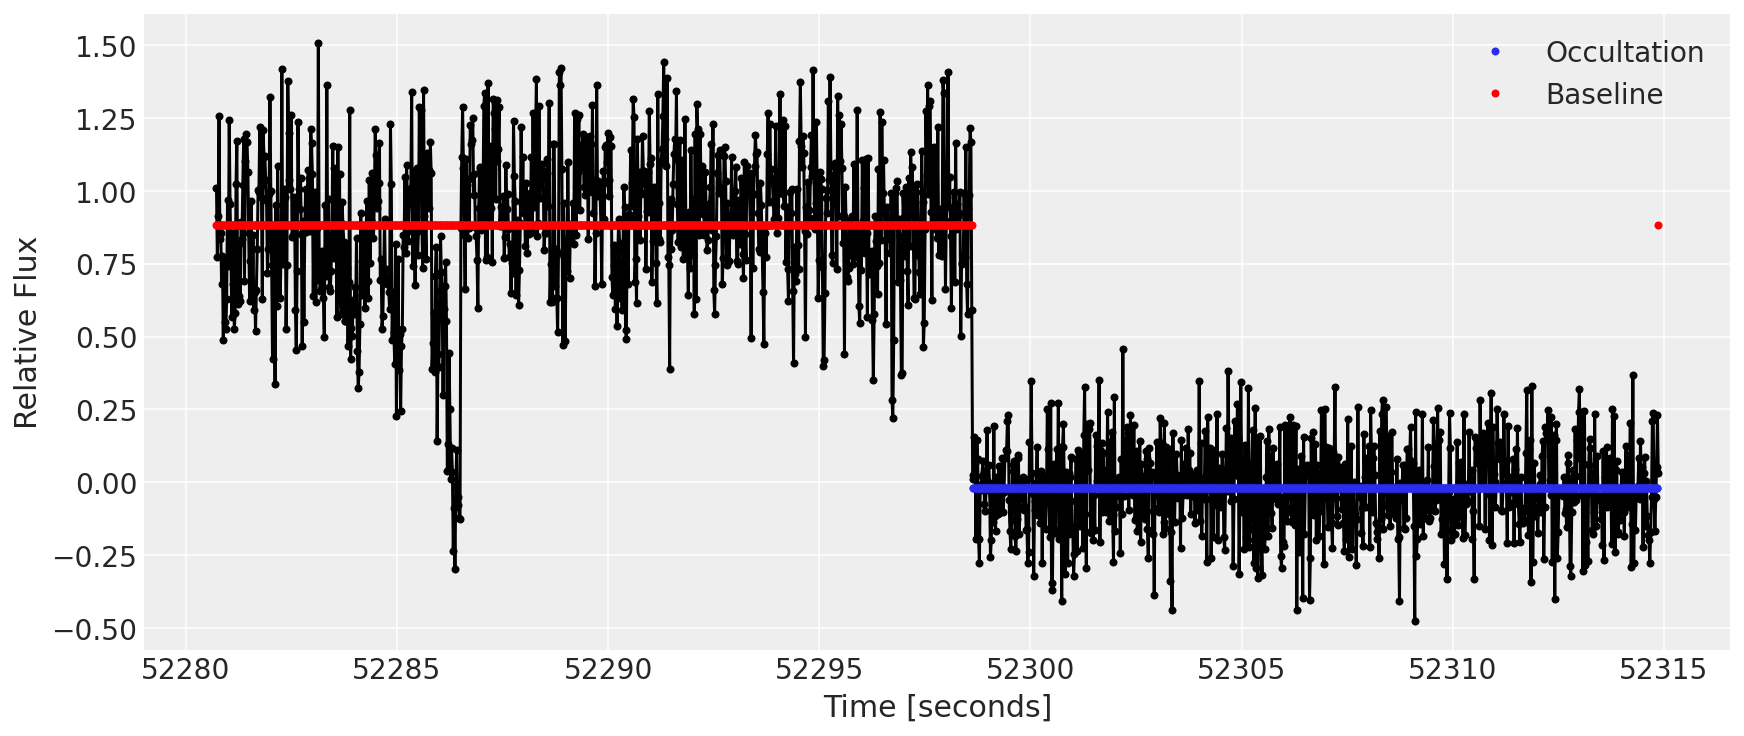

In [33]:
plt.figure(figsize=(12,5))
tes2 = lc.occ_detect(plot=True)

tes2

**Parameter untuk model**

In [34]:
immersion_time = 52298.627  # seconds relative to tref
emersion_time  = 52315  # seconds relative to tref
opacity = 1.0            # 1.0 == opaque; 0.0 == transparent

tmin = immersion_time  - 5 # seconds relative to tref
tmax = emersion_time   + 5 # seconds relative to tref

mask = (lc.time > tmin) & (lc.time < tmax)

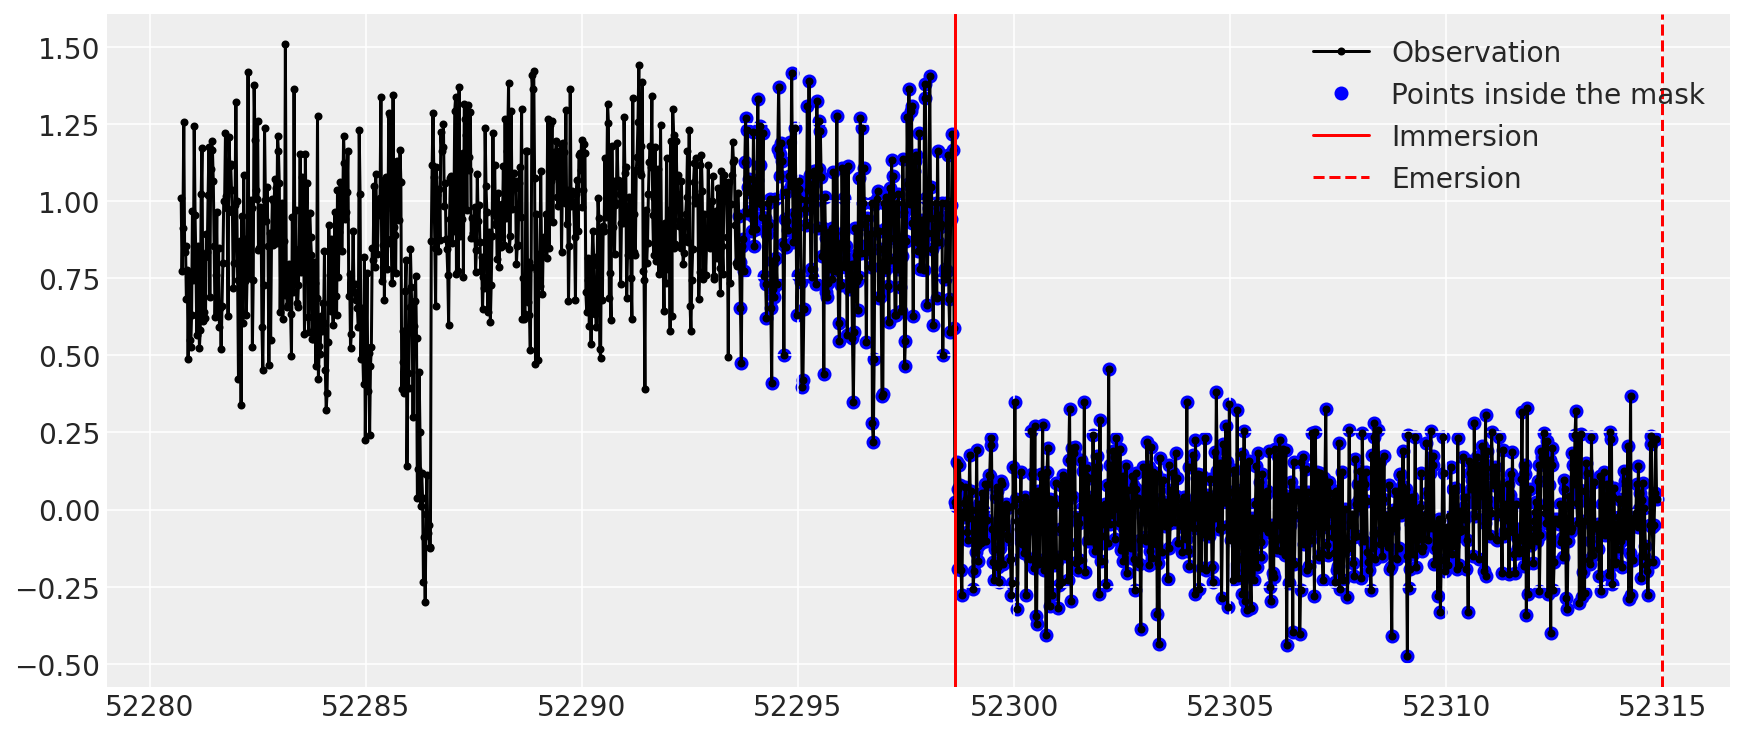

In [35]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time,color='r',linestyle='-',label='Immersion')
plt.axvline(emersion_time,color='r',linestyle='--',label='Emersion')
plt.legend()

In [36]:
lc_chi2 = lc.occ_lcfit(loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [37]:
print(lc_chi2)

Minimum chi-square: 1323.488
Number of fitted points: 1700
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 0.779

immersion:
    1-sigma: 52298.615 +/- 0.003
    3-sigma: 52298.617 +/- 0.022

emersion:
    1-sigma: 52314.887 +/- 0.012
    3-sigma: 52314.878 +/- 0.020



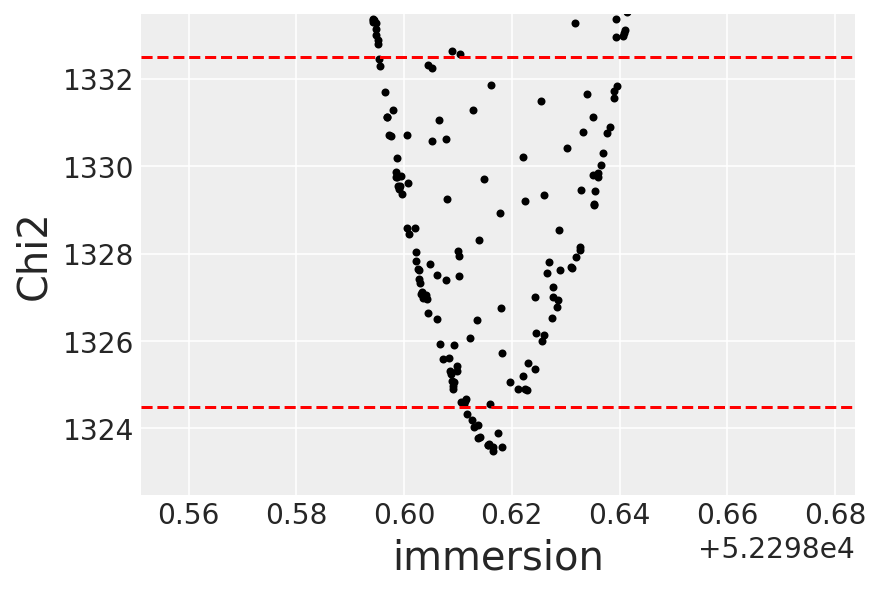

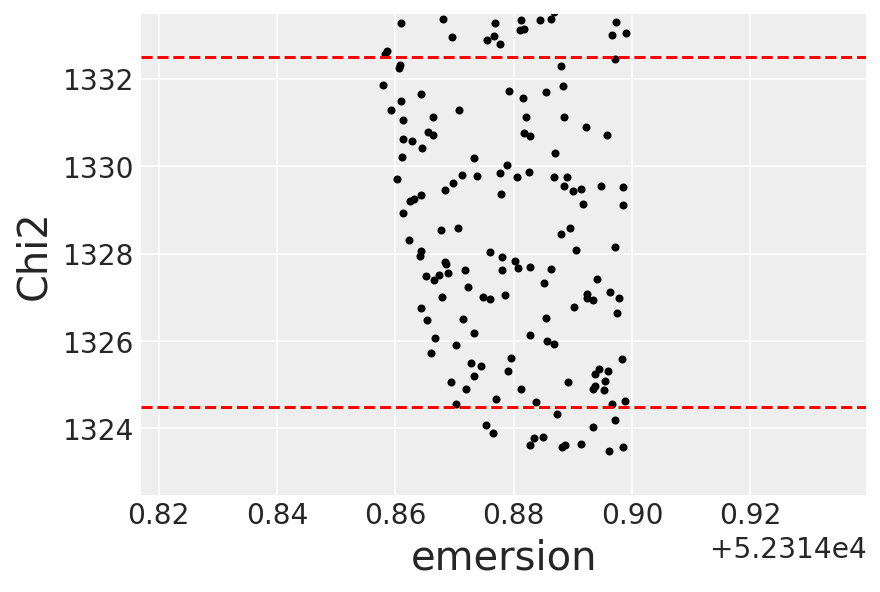

In [38]:
lc_chi2.plot_chi2()

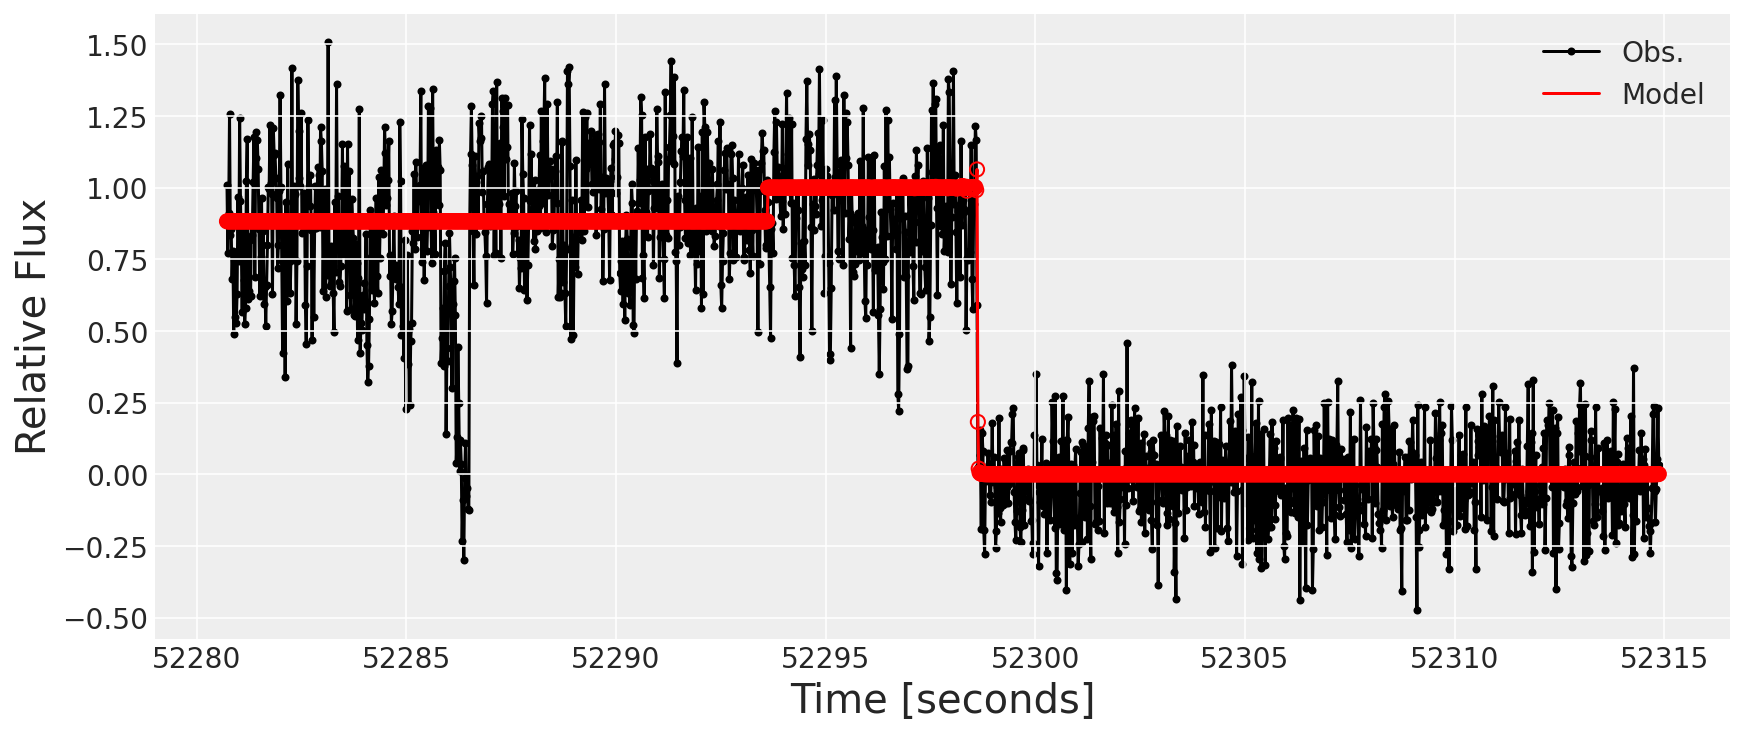

In [40]:
plt.figure(figsize=(12,5))
lc.occ_model(immersion_time, emersion_time, opacity, mask)

lc.plot_lc()
# plt.xlim(50680,50682)
# plt.ylim(-0.5,3)

Karena pada pengamatan ini tidak mengalami *emmersion*, maka plot *immersion* saja.

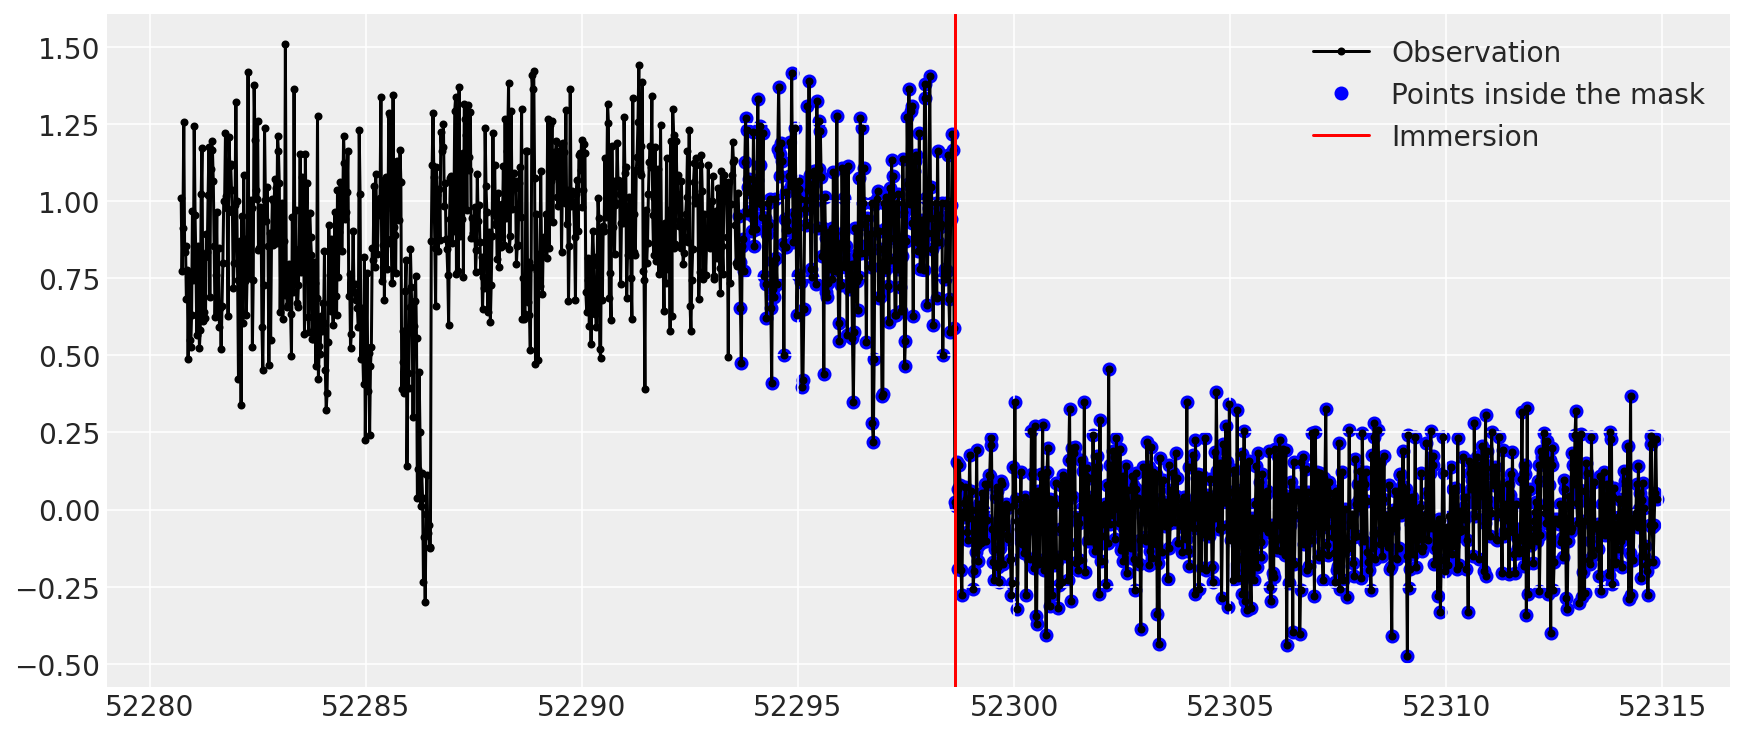

In [41]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time, color='r',linestyle='-',label='Immersion')
plt.legend()

In [42]:
lc_chi2_imm = lc.occ_lcfit(tmin=tmin, tmax=tmax, immersion_time=immersion_time, loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [43]:
print(lc_chi2_imm)

Minimum chi-square: 833.913
Number of fitted points: 1058
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.789

immersion:
    1-sigma: 52298.616 +/- 0.004
    3-sigma: 52298.618 +/- 0.020



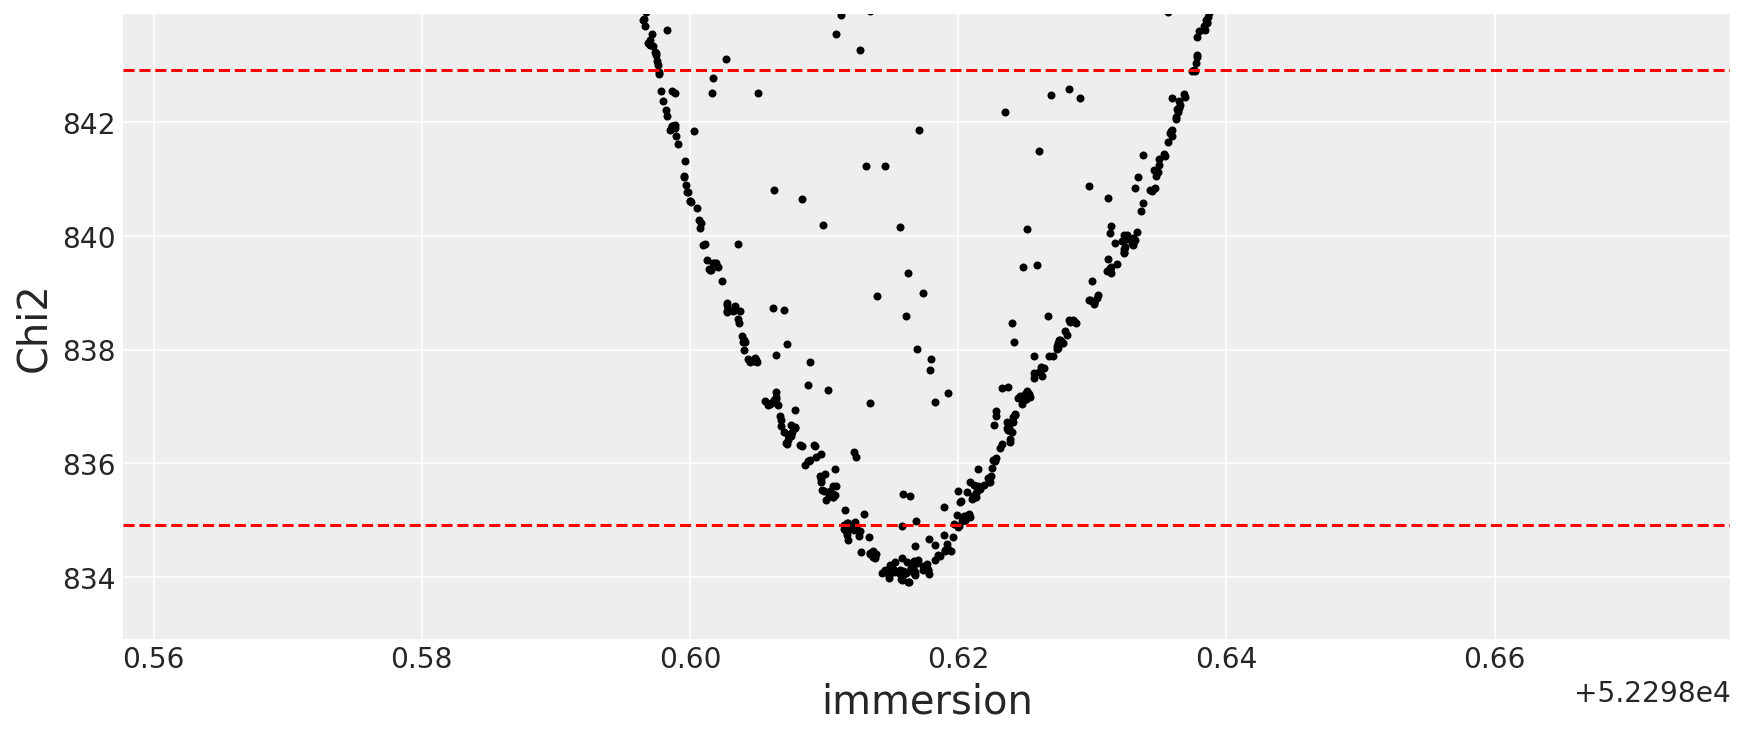

In [44]:
plt.figure(figsize=(12,5))
lc_chi2_imm.plot_chi2()

In [45]:
print(lc)

Light curve name: SAO 184555
Initial time: 2022-08-09 14:31:20.727 UTC
End time:     2022-08-09 14:31:54.869 UTC
Duration:     0.569 minutes
Time offset:  0.000 seconds

Exposure time:    0.0200 seconds
Cycle time:       0.0201 seconds
Num. data points: 1700

Bandpass:             0.550 +/- 0.200 microns
Object Distance:      0.00 AU
Used shadow velocity: 0.658 km/s
Fresnel scale:        0.015 seconds or 0.01 km
Stellar size effect:  0.001 seconds or 0.00 km
Inst. response:       0.020 seconds or 0.01 km
Dead time effect:     0.000 seconds or 0.00 km
Model resolution:     0.002 seconds or 0.00 km
Modelled baseflux:    0.883
Modelled bottomflux:  0.097
Light curve sigma:    0.226

Immersion time: 2022-08-09 14:31:38.616 UTC +/- 0.004 seconds
Emersion time:  2022-08-09 14:31:54.887 UTC +/- 0.012 seconds

Monte Carlo chi square fit.

Minimum chi-square: 833.913
Number of fitted points: 1058
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.789

immersion:
    1-si

(52297.0, 52300.0)

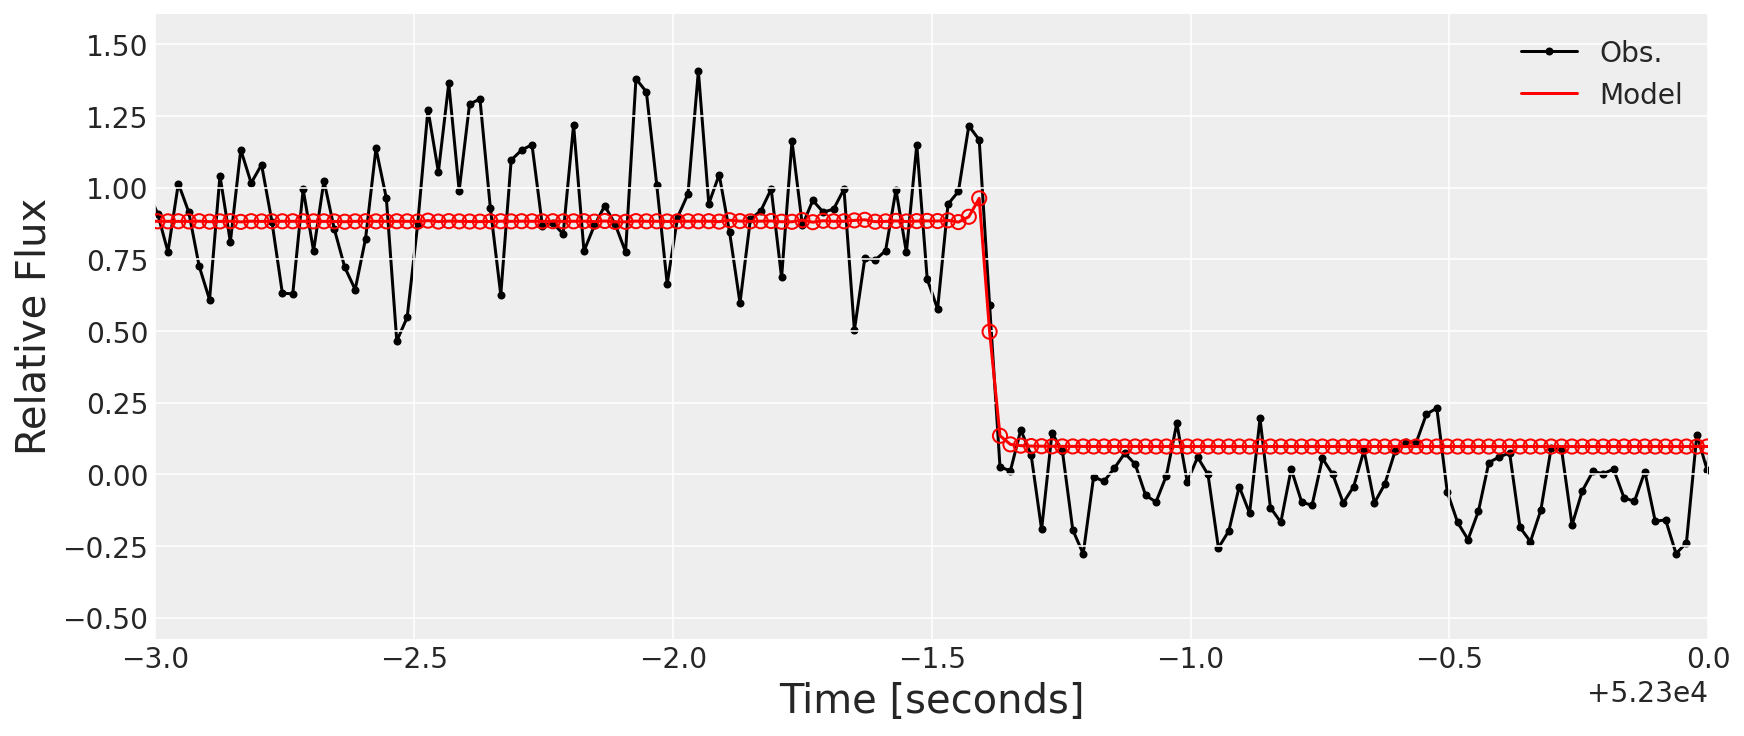

In [50]:
plt.figure(figsize=(12,5))
lc.plot_lc()
plt.xlim(52297, 52300)

(52297.0, 52300.0)

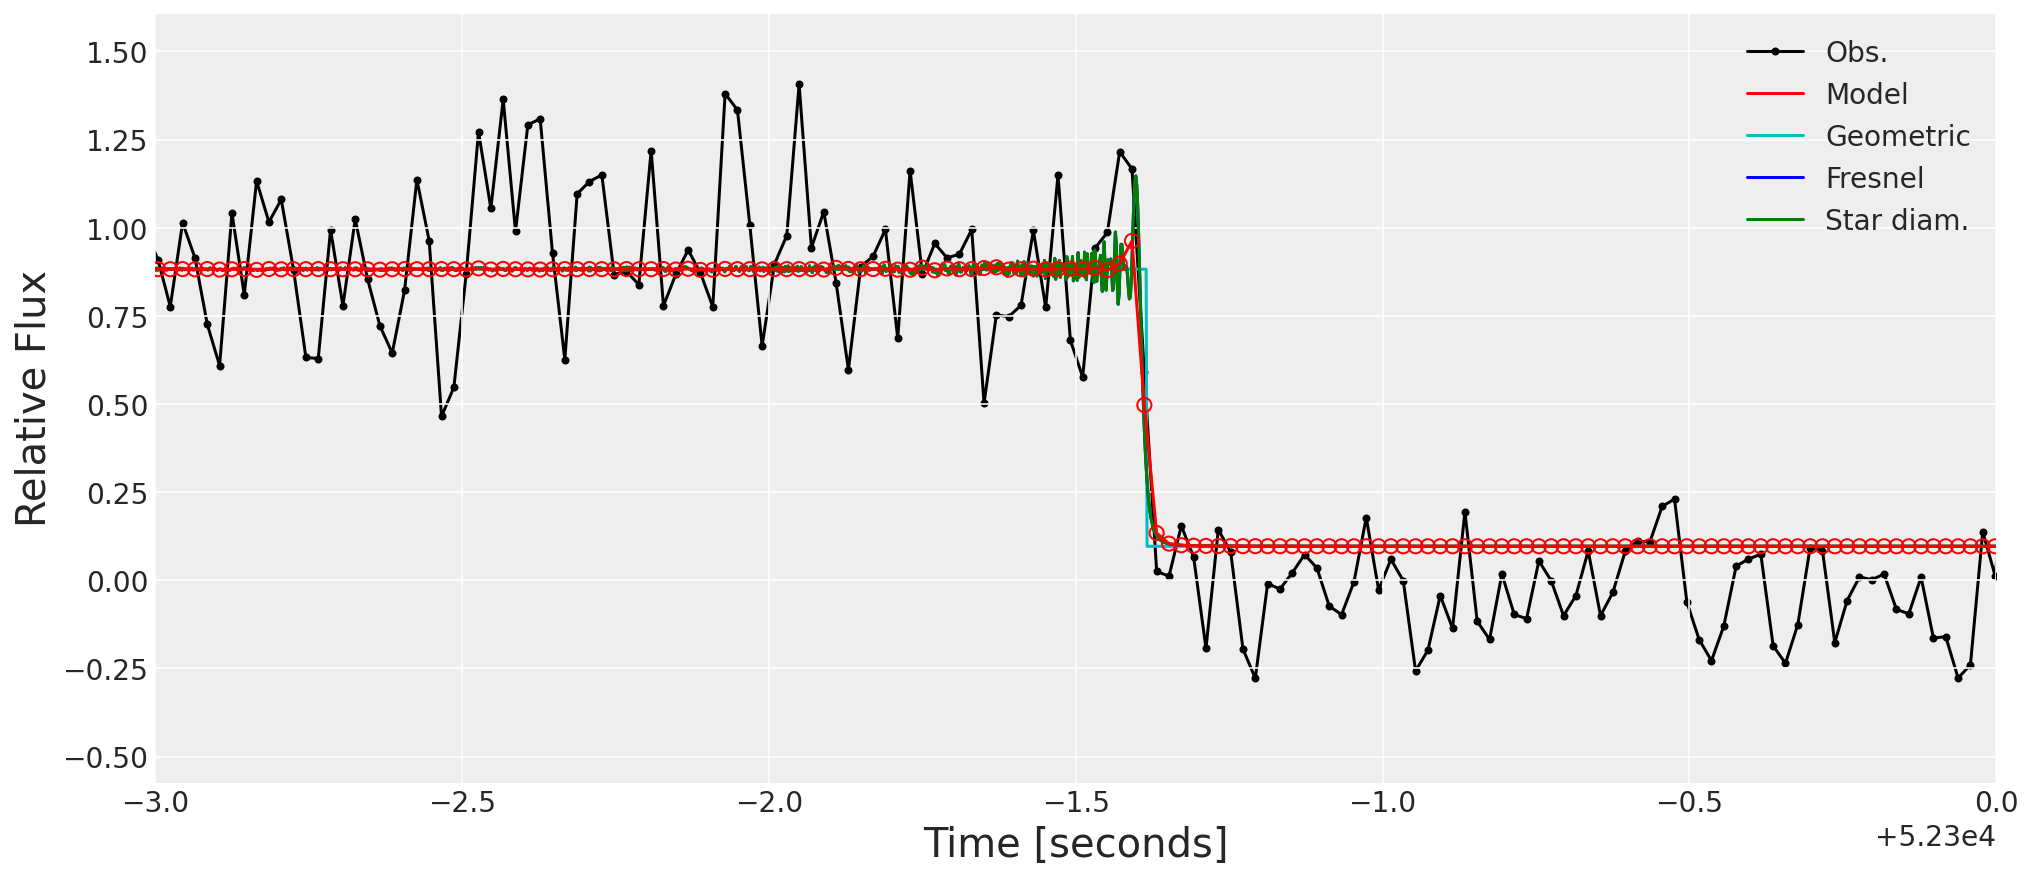

In [51]:
plt.figure(figsize=(14,6))
lc.plot_lc()
lc.plot_model()

plt.xlim(52297, 52300)
# plt.ylim(-0.25, 1.5)

In [52]:
lc.immersion

<Time object: scale='utc' format='iso' value=2022-08-09 14:31:38.616>